In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb,info = tfds.load('imdb_reviews',with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3SYH9A/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3SYH9A/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete3SYH9A/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'],imdb['test']

In [ ]:
#tensorspect data we are retriving

training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))   #Converting the tensot to numpy
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())

In [ ]:
training_sentences[5]

'b"This is a film which should be seen by anybody interested in, effected by, or suffering from an eating disorder. It is an amazingly accurate and sensitive portrayal of bulimia in a teenage girl, its causes and its symptoms. The girl is played by one of the most brilliant young actresses working in cinema today, Alison Lohman, who was later so spectacular in \'Where the Truth Lies\'. I would recommend that this film be shown in all schools, as you will never see a better on this subject. Alison Lohman is absolutely outstanding, and one marvels at her ability to convey the anguish of a girl suffering from this compulsive disorder. If barometers tell us the air pressure, Alison Lohman tells us the emotional pressure with the same degree of accuracy. Her emotional range is so precise, each scene could be measured microscopically for its gradations of trauma, on a scale of rising hysteria and desperation which reaches unbearable intensity. Mare Winningham is the perfect choice to play he

In [ ]:
training_labels[5]

1

In [ ]:
len(training_sentences), len(testing_sentences)

(25000, 25000)

In [ ]:
#using counter    to get the count for each category

from collections import Counter
Counter(training_labels)

Counter({0: 12500, 1: 12500})

In [ ]:
#data in array format

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = 'post'

In [ ]:
pip install keras_preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.0 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index;
len(word_index)

86538

In [ ]:
#to match them in perfect sequences

sequences  = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [ ]:
padded.shape

(25000, 120)

In [ ]:
testing_padded.shape

(25000, 120)

In [ ]:
padded

array([[   0,    0,    0, ...,  873,  144,    9],
       [   0,    0,    0, ...,   31,   30,   46],
       [6174,    1, 4915, ...,    8, 6175,   46],
       ...,
       [7628,   36,   10, ...,  167,    5,   28],
       [2676,   10,  215, ...,    1,   88,   10],
       [3874,    4,   30, ...,    5,  994, 5125]], dtype=int32)

In [ ]:
len(word_index)

86538

In [ ]:
#Build the model

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Embedding,LSTM,Bidirectional

In [ ]:
model_lstm = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),

    Bidirectional(LSTM(32)),

    Dense(10,activation='relu'),

    Dense(1,activation='sigmoid')         #binary data
])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173205 (676.58 KB)
Trainable params: 173205 (676.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm.compile(loss = 'binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model_lstm.fit(padded, training_labels_final,epochs=3,validation_data=(testing_padded,testing_labels_final))

Epoch 1/3
782/782 [==============================] - 77s 86ms/step - loss: 0.4463 - accuracy: 0.7837 - val_loss: 0.3388 - val_accuracy: 0.8530
Epoch 2/3
782/782 [==============================] - 29s 37ms/step - loss: 0.2819 - accuracy: 0.8890 - val_loss: 0.3733 - val_accuracy: 0.8436
Epoch 3/3
782/782 [==============================] - 22s 28ms/step - loss: 0.2309 - accuracy: 0.9134 - val_loss: 0.3861 - val_accuracy: 0.8414


In [ ]:
loss_df = pd.DataFrame(history.history)

In [ ]:
loss_df

,loss,accuracy,val_loss,val_accuracy
0,0.446295,0.78372,0.338758,0.85300
1,0.281897,0.88896,0.373261,0.84364
2,0.230894,0.91344,0.386113,0.84136


<Axes: >

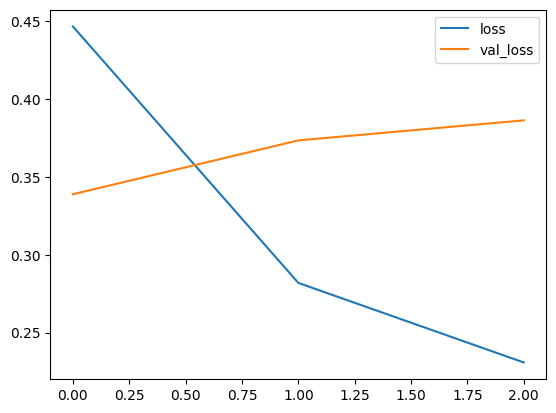

In [ ]:
loss_df.plot(y=['loss','val_loss'])

<Axes: >

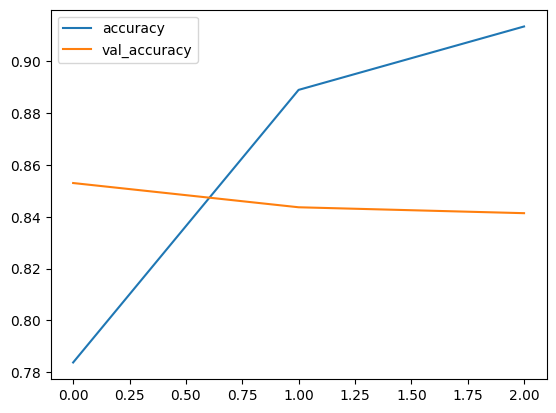

In [ ]:
loss_df.plot(y=['accuracy','val_accuracy'])

In [ ]:
new1 = 'This was worst movie. please do not watch it. waste of money and time.'
new2 = 'A must watch movie. I loved to watch it. it was just amazing.'

In [ ]:
def predict(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded = pad_sequences(sequences,maxlen = max_length,
                       truncating = trunc_type)
  pred_probas = model_lstm.predict(padded)
  percent_pos = pred_proba[0,0]
  if round(percent_pos) == 0:
    print((1-percent_pos),'Negative')
  else:
    print(percent_pos,'Positive')

In [ ]:
predict(new1)

1/1 [==============================] - 0s 21ms/step
0.9816678613424301 Negative


In [ ]:
predict(new2)

1/1 [==============================] - 0s 20ms/step
0.9816678613424301 Negative


In [ ]:
def rate_predict(text):
  sequences  = tokenizer.texts_to_sequences([text])
  padded = pad_sequences(sequences, maxlen = max_length, truncating=trunc_type)

  pred_proba = model_lstm.predict(padded)

  return 'Positive' if pred_proba[0] >0.5 else 'Negative'

In [ ]:
rate_predict(new1)

1/1 [==============================] - 0s 31ms/step


'Negative'

In [ ]:
rate_predict(new2)

1/1 [==============================] - 0s 74ms/step


'Positive'